## Import Libraries

In [1]:
import pandas as pd
import time
import random
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,recall_score,precision_score,roc_auc_score
from sklearn.linear_model import LogisticRegression #LogisticRegression
from sklearn.tree import DecisionTreeClassifier #DecisionTreeRegresor
from sklearn.ensemble import RandomForestClassifier  # RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier #Adaptive Boost
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.ensemble import GradientBoostingClassifier #Gradient Boost 
from sklearn.svm import SVC #SVC
from sklearn.naive_bayes import GaussianNB #NaiveBayes
from IPython.display import Image  
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\shamr\OneDrive\Shamreen\ML\LearnBay\Stats&ML\Capstone Project\Dataset\cat2.csv')

In [3]:
data.head(3)

,Unnamed: 0,online_booking,mobile_site_booking,Car_Cancellation,from_date,from_month,weekend,holiday,festivals,hourOfDay,distance,from_cancel_zone,to_cancel_zone
0,0,0,0,0,1,1,0,0,0,6,8016,1,1
1,1,0,0,0,1,1,0,0,0,2,8015,1,1
2,2,0,0,0,1,1,0,0,0,6,8009,1,1


In [4]:
#remove unwanted index column
data = data.drop('Unnamed: 0',axis=1)
data.head(3)

,online_booking,mobile_site_booking,Car_Cancellation,from_date,from_month,weekend,holiday,festivals,hourOfDay,distance,from_cancel_zone,to_cancel_zone
0,0,0,0,1,1,0,0,0,6,8016,1,1
1,0,0,0,1,1,0,0,0,2,8015,1,1
2,0,0,0,1,1,0,0,0,6,8009,1,1


In [5]:
data.shape

(34292, 12)

In [6]:
data.columns

Index(['online_booking', 'mobile_site_booking', 'Car_Cancellation',
       'from_date', 'from_month', 'weekend', 'holiday', 'festivals',
       'hourOfDay', 'distance', 'from_cancel_zone', 'to_cancel_zone'],
      dtype='object')

In [7]:
names =['online_booking', 'mobile_site_booking',
       'from_date', 'booking_month', 'weekend', 'festivals', 'hourOfDay',
       'intercity_distance', 'cancel_zone'],

dx = ['Cancel', 'notCancel']

## Separate data into features and target 

In [8]:
X = data.loc[:,data.columns!='Car_Cancellation'].values
X

array([[   0,    0,    1, ..., 8016,    1,    1],
       [   0,    0,    1, ..., 8015,    1,    1],
       [   0,    0,    1, ..., 8009,    1,    1],
       ...,
       [   1,    0,   11, ..., 7986,    1,    1],
       [   0,    0,   11, ..., 8008,    1,    1],
       [   0,    1,   11, ..., 8005,    1,    1]], dtype=int64)

In [9]:
y = data.Car_Cancellation.values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [10]:
print("Shape of features set X: ",X.shape)
print("Shape of target Y: ",y.shape)

Shape of features set X:  (34292, 11)
Shape of target Y:  (34292,)


### Train and Test split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
print("Data of training features: ",x_train.shape)
print("Data of testing features: ",x_test.shape)
print("\n")
print("Data of training target: ",y_train.shape)
print("Data of testing target: ",y_test.shape)

Data of training features:  (24004, 11)
Data of testing features:  (10288, 11)


Data of training target:  (24004,)
Data of testing target:  (10288,)


In [13]:
std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

In [14]:
x_train

array([[ 1.31915983e+00, -2.26462845e-01, -8.34554842e-01, ...,
         5.60764328e-04,  1.56401644e-01,  1.17275296e-01],
       [-7.58058258e-01, -2.26462845e-01,  1.84158303e-01, ...,
         9.77538848e-01,  1.56401644e-01,  1.17275296e-01],
       [-7.58058258e-01, -2.26462845e-01, -8.34554842e-01, ...,
         8.68985728e-01,  1.56401644e-01,  1.17275296e-01],
       ...,
       [-7.58058258e-01, -2.26462845e-01, -4.94983794e-01, ...,
         4.34773246e-01,  1.56401644e-01,  1.17275296e-01],
       [ 1.31915983e+00, -2.26462845e-01, -1.85326799e+00, ...,
        -3.25098597e-01, -3.80379358e+00,  1.17275296e-01],
       [-7.58058258e-01, -2.26462845e-01,  1.84158303e-01, ...,
         8.68985728e-01,  1.56401644e-01,  1.17275296e-01]])

In [15]:
x_test

array([[ 1.33718955, -0.22073919,  0.52416008, ..., -1.64028621,
         0.15961372,  0.10188062],
       [ 1.33718955, -0.22073919,  1.20285353, ...,  0.42861495,
         0.15961372,  0.10188062],
       [-0.74783714,  4.53023317,  0.52416008, ..., -0.00694319,
         0.15961372,  0.10188062],
       ...,
       [ 1.33718955, -0.22073919,  1.54220026, ..., -0.55139086,
         0.15961372,  0.10188062],
       [-0.74783714, -0.22073919,  0.52416008, ...,  0.97306262,
         0.15961372,  0.10188062],
       [-0.74783714,  4.53023317,  0.8635068 , ...,  0.10194635,
         0.15961372,  0.10188062]])

## Model 1 - Logistic Regression

In [16]:
model_logreg = LogisticRegression(random_state=0)
model_logreg.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [17]:
y_pred = model_logreg.predict(x_test)
y_pred[0:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [18]:
y_test[0:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Performance metrics

In [19]:
#Confusion metrics
conf_matrix_logreg = confusion_matrix(y_test,y_pred)
conf_matrix_logreg

array([[9416,   42],
       [ 782,   48]], dtype=int64)

<Axes: >

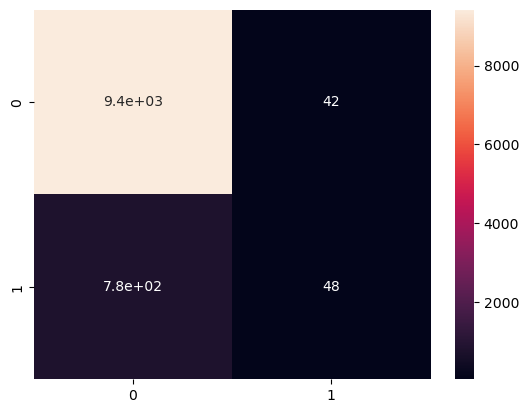

In [20]:
sns.heatmap(conf_matrix_logreg,annot=True)

In [21]:
#accuracy
accuracy_logreg = metrics.accuracy_score(y_test,y_pred)
accuracy_logreg

0.9199066874027994

In [22]:
#precision
precision_logreg = metrics.precision_score(y_test,y_pred)
precision_logreg

0.5333333333333333

In [23]:
#recall
recall_logreg = metrics.recall_score(y_test,y_pred)
recall_logreg

0.05783132530120482

In [24]:
#AUC
y_pred_proba = model_logreg.predict_proba(x_test)[::,1]
auc_logreg = metrics.roc_auc_score(y_test,y_pred_proba)
auc_logreg

0.7852734473525311

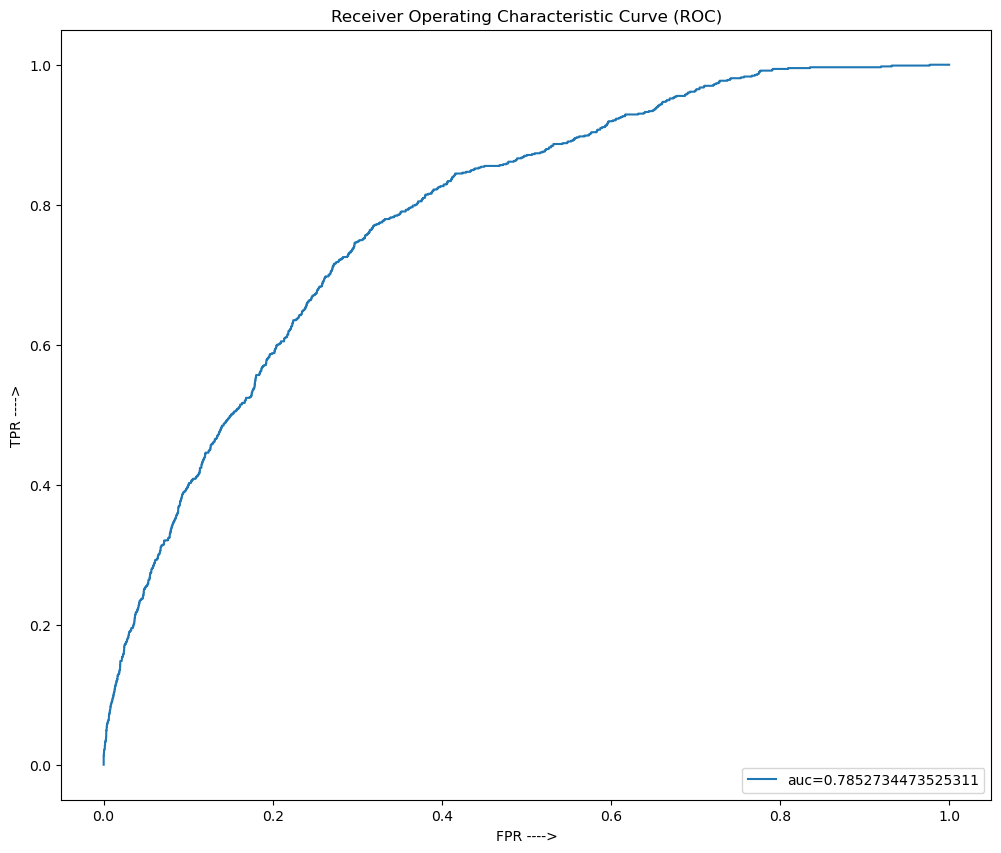

In [25]:
y_pred_proba = model_logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

## Model 2 - Decision Tree

###### Decision Tree with depth 2

In [26]:
model_dt2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt2.fit(x_train,y_train)

model_dt2_score_train = model_dt2.score(x_train,y_train)

model_dt2_score_test = model_dt2.score(x_test,y_test)

print('Training Score',model_dt2_score_train)

print('Testing Score',model_dt2_score_test)

Training Score 0.9189718380269954
Testing Score 0.9193234836702955


###### Decision Tree with depth 4

In [27]:
model_dt4 = DecisionTreeClassifier(random_state=1,max_depth=4)

model_dt4.fit(x_train,y_train)

model_dt4_score_train = model_dt4.score(x_train,y_train)

model_dt4_score_test = model_dt4.score(x_test,y_test)

print('Training Score',model_dt4_score_train)

print('Testing Score',model_dt4_score_test)

Training Score 0.9200133311114814
Testing Score 0.9195178849144634


###### Decision Tree with depth 6

In [28]:
model_dt6 = DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt6.fit(x_train,y_train)

model_dt6_score_train = model_dt6.score(x_train,y_train)

model_dt6_score_test = model_dt6.score(x_test,y_test)

print('Training Score',model_dt6_score_train)

print('Testing Score',model_dt6_score_test)

Training Score 0.9250124979170138
Testing Score 0.9211702954898912


###### Decision Tree with depth 8

In [29]:
model_dt8 = DecisionTreeClassifier(random_state=1,max_depth=8)

model_dt8.fit(x_train,y_train)

model_dt8_score_train = model_dt8.score(x_train,y_train)

model_dt8_score_test = model_dt8.score(x_test,y_test)

print('Training Score',model_dt8_score_train)

print('Testing Score',model_dt8_score_test)

Training Score 0.930553241126479
Testing Score 0.9184486780715396


#### Decision Tree with 6 (entropy)

In [30]:
model_dt6 = DecisionTreeClassifier(max_depth=6,criterion='entropy')

model_dt6.fit(x_train,y_train)

y_pred_dt6 = model_dt6.predict(x_test)
y_pred_proba_dt6 = model_dt6.predict_proba(x_test)[:,1]
# y_pred_dt

model_dt6_score_train = model_dt6.score(x_train,y_train)
print(model_dt6_score_train)

model_dt6_score_test = model_dt6.score(x_test,y_test)
print(model_dt6_score_test)

0.9244292617897018
0.9201982892690513


In [31]:
y_pred_dt6

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Graphical Representation of Tree

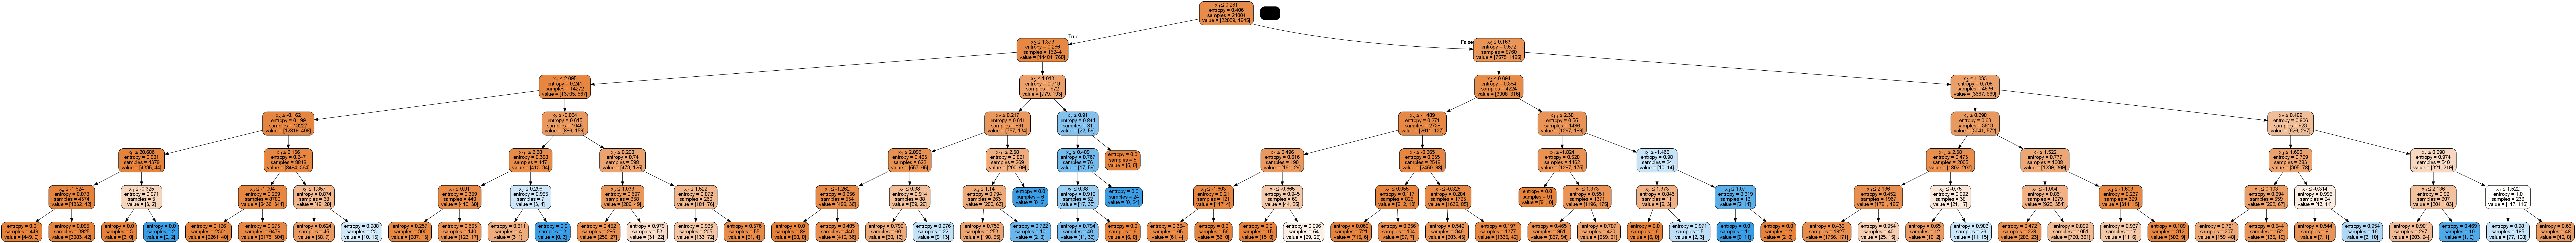

<Figure size 1000x800 with 0 Axes>

In [32]:
plt.figure(figsize=(10,8))
dot_data = StringIO()
export_graphviz(model_dt6,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [33]:
predictions = model_dt6.predict(x_test)
# print(predictions)

print(model_dt6.score(x_test,y_test))
y_actual_result = y_test[0]
# print(y_actual_result)

0.9201982892690513


### Performance metrics

In [34]:
#Confusion metrics
conf_matrix_dt = confusion_matrix(y_test,y_pred_dt6)
conf_matrix_dt

array([[9368,   90],
       [ 731,   99]], dtype=int64)

<Axes: >

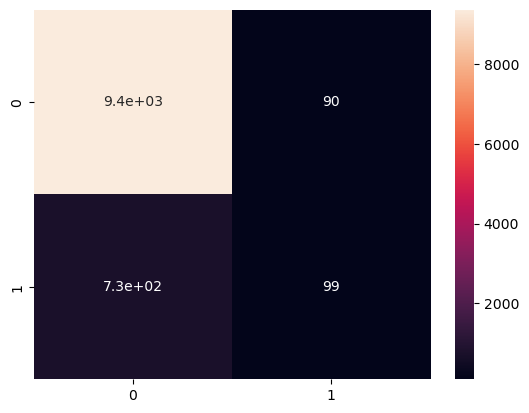

In [35]:
sns.heatmap(conf_matrix_dt,annot=True)

In [36]:
#accuracy
accuracy_dt = metrics.accuracy_score(y_test,y_pred_dt6)
accuracy_dt

0.9201982892690513

In [37]:
#precision
precision_dt = metrics.precision_score(y_test,y_pred_dt6)
precision_dt

0.5238095238095238

In [38]:
#recall
recall_dt = metrics.recall_score(y_test,y_pred_dt6)
recall_dt

0.11927710843373494

In [39]:
#AUC
y_pred_proba = model_dt6.predict_proba(x_test)[::,1]
auc_dt = metrics.roc_auc_score(y_test,y_pred_proba)
auc_dt

0.7954865773094494

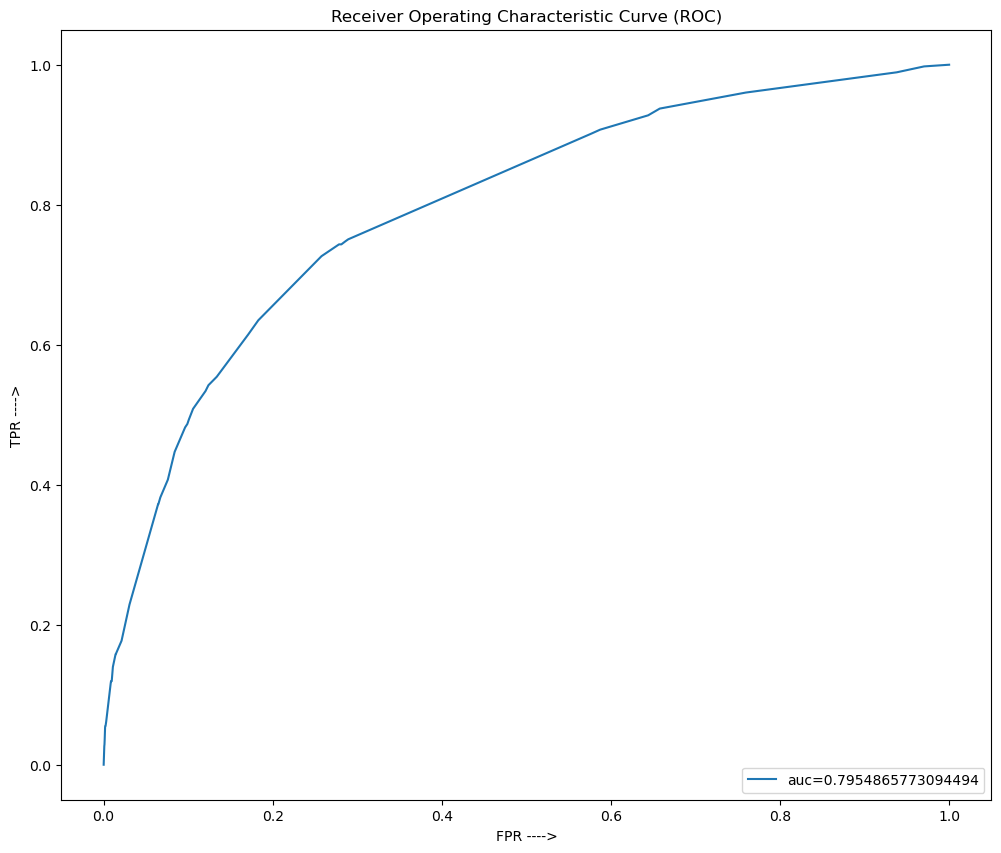

In [40]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

## Model 3 - Random Forest Classifier

In [41]:
data.columns

Index(['online_booking', 'mobile_site_booking', 'Car_Cancellation',
       'from_date', 'from_month', 'weekend', 'holiday', 'festivals',
       'hourOfDay', 'distance', 'from_cancel_zone', 'to_cancel_zone'],
      dtype='object')

In [42]:
names = ['online_booking', 'mobile_site_booking',
       'from_date', 'from_month', 'weekend', 'holiday', 'festivals',
       'hourOfDay', 'distance', 'from_cancel_zone', 'to_cancel_zone']

dx = ['Cancel', 'NotCancel']

In [43]:
names_index = names[2:]
# print(names_index)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=40)

#### Random Forest Classifier

In [45]:
fit_rf = RandomForestClassifier(random_state=40)

### Hyper_Parameter Optimization Using GridSearchCV

In [65]:
np.random.seed(40)
start = time.time()

param_dist = {'max_depth':[2,3,4,5],
             'bootstrap':[True,False],
             'max_features':['auto','sqrt','log2',None],
             'criterion':['gini','entropy']}

cv_rf = GridSearchCV(fit_rf,cv=10,param_grid=param_dist,n_jobs=3)

cv_rf.fit(x_train,y_train)

print('Best Parameters using Grid search: \n',cv_rf.best_params_)

end = time.time()
print('Time taken in grid search: %0.2f'%(end-start))

Best Parameters using Grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None}
Time taken in grid search: 467.61


In [46]:
fit_rf.set_params(criterion='entropy',max_features = None,max_depth = 5)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=None,
                       random_state=40)

### OOB Rate

In [ ]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 100
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(x_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [49]:
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 Trees)')

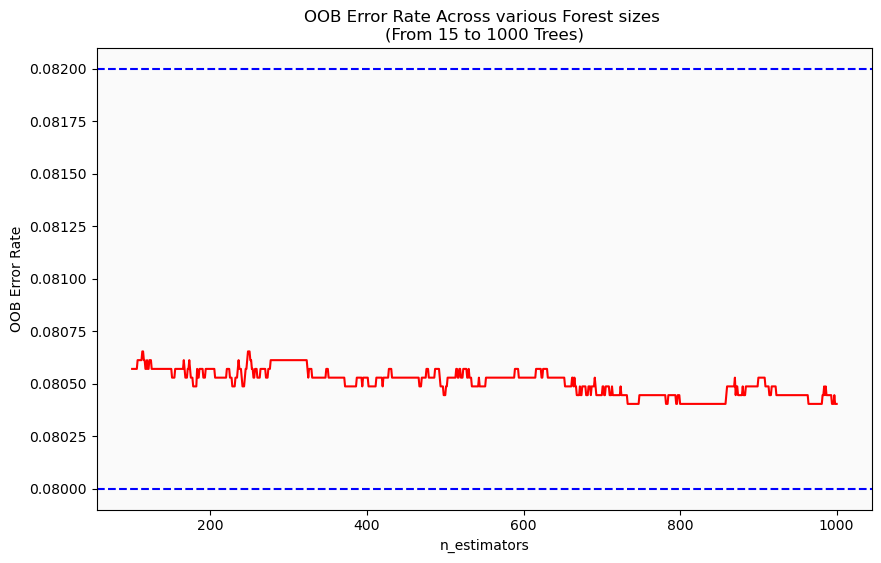

In [53]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.082,color='blue',linestyle='--')
plt.axhline(0.080,color='blue',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 Trees)')

In [54]:
print('OOB Error rate for 700 trees is: %0.5f'%oob_series[700])

OOB Error rate for 700 trees is: 0.08044


In [47]:
fit_rf.set_params(n_estimators=700,bootstrap=True,warm_start=False,oob_score=False)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=None,
                       n_estimators=700, random_state=40)

#### Train The Random Forest

In [48]:
model_rf = fit_rf.fit(x_train,y_train)

### Predictions

In [49]:
#x_test = x_test.values.ravel()
y_pred_rf = fit_rf.predict(x_test)

In [50]:
print(y_pred_rf)

[0 0 0 ... 0 0 0]


In [51]:
print(y_test)

[0 0 0 ... 0 0 0]


### Performance metrics

In [52]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

In [53]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple'],
              'ab': ['Ada Boost','blue'],
              'gb': ['Gradient Boost','green']     }

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

### Confusion Metrics

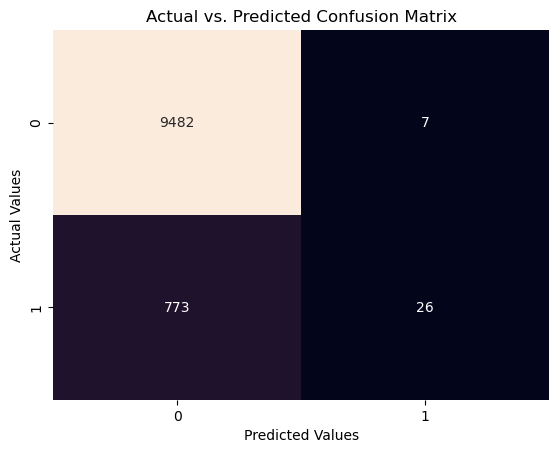

In [54]:
#Confusion metrics
conf_matrix_rf = create_conf_mat(y_test,y_pred_rf)
sns.heatmap(conf_matrix_rf,annot=True,fmt='d',cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

### Accuracy

In [55]:
#accuracy
accuracy_rf = model_rf.score(x_test,y_test)
accuracy_rf

0.9241835147744946

### Precision

In [56]:
#precision
precision_rf = metrics.precision_score(y_test,y_pred_rf)
precision_rf

0.7878787878787878

### Recall

In [57]:
#recall
recall_rf = metrics.recall_score(y_test,y_pred_rf)
recall_rf

0.03254067584480601

### Area Under the Curve (AUC)

In [58]:
#AUC
predictions_proba = model_rf.predict_proba(x_test)[:,1]
fpr2, tpr2, _ = roc_curve(y_test,predictions_proba,pos_label=1)

In [59]:
auc_rf = metrics.auc(fpr2,tpr2)

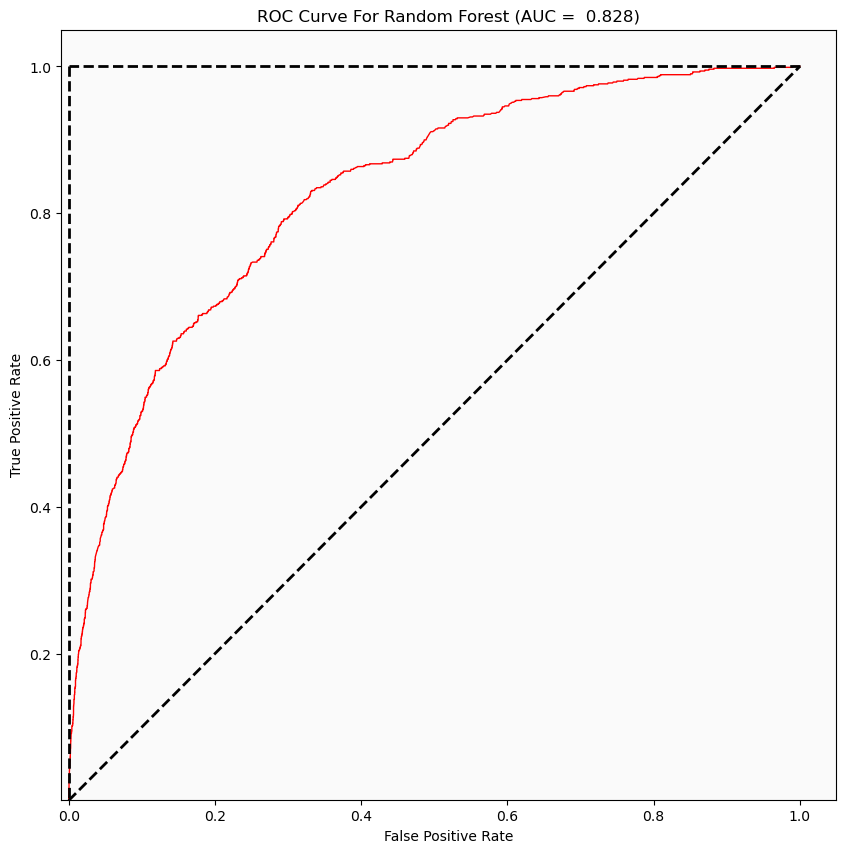

In [60]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

## Model 4 -  AdaBoost Classifier

In [61]:
fit_ab =  AdaBoostClassifier(random_state=40)

## Hyper parameter tuning for gridsearchCV 

In [70]:
#Hyper parameter tuning for gridsearchCV 
np.random.seed(40)
start = time.time()
parameters = {'n_estimators' :[10,50,100,500],
              'learning_rate':[0.0001,0.001,0.01,0.1,1],
              'algorithm': ['SAMME', 'SAMME.R']
             }
#n_estimators parameter will be selected in next step using oob score
cv_ab = GridSearchCV(fit_ab,cv=10,param_grid=parameters,n_jobs=3)
cv_ab.fit(x_train,y_train)

print("Best Parameters using GridSearchCV: ", cv_ab.best_params_)
end=time.time()

print("time taken to execute: %0.2f"%(end-start))

Best Parameters using GridSearchCV:  {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 500}
time taken to execute: 350.66


In [62]:
fit_ab.set_params(algorithm='SAMME.R',learning_rate= 0.1,n_estimators= 500)

AdaBoostClassifier(learning_rate=0.1, n_estimators=500, random_state=40)

### Train AdaBoost

In [63]:
model_ab = fit_ab.fit(x_train,y_train)

### Predictions

In [64]:
y_pred_ab = fit_ab.predict(x_test)

In [65]:
print(y_pred_ab)

[0 0 0 ... 0 0 0]


## Performance

### Confusion Metrics

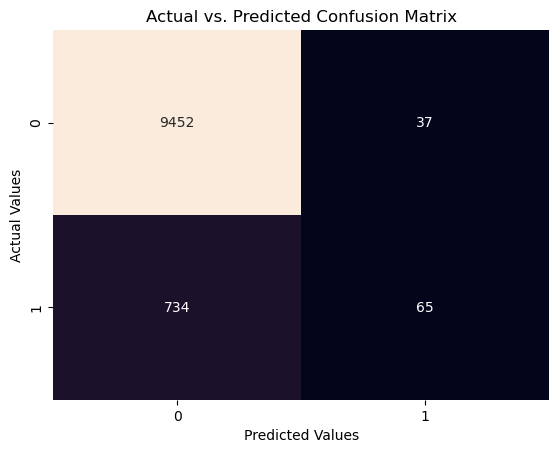

In [66]:
#Confusion metrics
conf_matrix_ab = create_conf_mat(y_test,y_pred_ab)
sns.heatmap(conf_matrix_ab,annot=True,fmt='d',cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

### Accuracy

In [67]:
#accuracy
accuracy_ab = model_ab.score(x_test,y_test)
accuracy_ab

0.9250583203732504

### Precision

In [68]:
#precision
precision_ab = metrics.precision_score(y_test,y_pred_ab)
precision_ab

0.6372549019607843

### Recall

In [69]:
#recall
recall_ab = metrics.recall_score(y_test,y_pred_ab)
recall_ab

0.08135168961201501

### Error Rate

In [70]:
test_error_rate_ab = 1 - accuracy_ab
print("Error Rate of our model is : %0.5f"%test_error_rate_ab)

Error Rate of our model is : 0.07494


### Area Under the Curve (AUC)

In [71]:
predictions_proba = model_ab.predict_proba(x_test)[:,1]
fpr2, tpr2, _ = roc_curve(y_test,predictions_proba,pos_label=1)

In [72]:
auc_ab = metrics.auc(fpr2,tpr2)

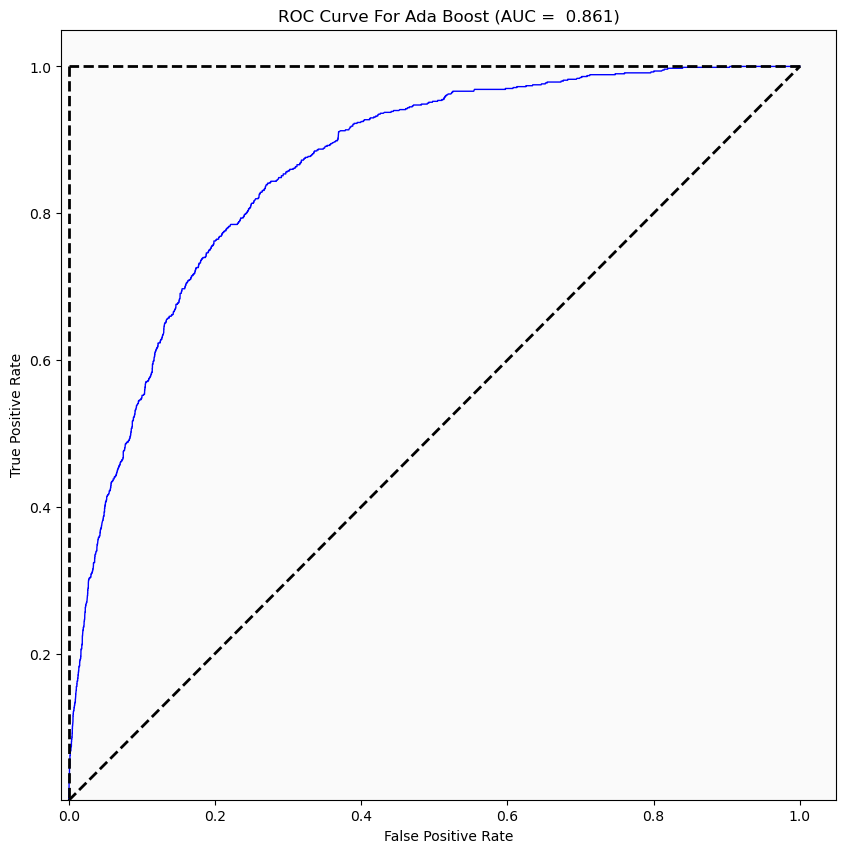

In [73]:
plot_roc_curve(fpr2, tpr2, auc_ab, 'ab',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

## Model 5 - GradientBoost Classifier

In [74]:
fit_gb = GradientBoostingClassifier(random_state=40)

### Hyper parameter tuning for gridsearchCV 

In [84]:
#Hyper parameter tuning for gridsearchCV 
np.random.seed(40)
start = time.time()
parameters = { 'n_estimators':[50,100,500],
              'learning_rate':[0.01,0.1,1],
              'max_features' :['sqrt','log2'],
              'max_depth':[2,4],
             }
#n_estimators parameter will be selected in next step using oob score
cv_gb = GridSearchCV(fit_gb,cv=10,param_grid=parameters,n_jobs=3)
cv_gb.fit(x_train,y_train)

print("Best Parameters using GridSearchCV: ", cv_gb.best_params_)
end=time.time()

print("time taken to execute: %0.2f"%(end-start))

Best Parameters using GridSearchCV:  {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500}
time taken to execute: 255.71


In [75]:
model_gb = fit_gb.set_params(n_estimators=500, 
                  learning_rate= 0.1, 
                  max_depth= 4, 
                  max_features= 'sqrt')

### Train GradientBoost

In [76]:
fit_gb.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=4, max_features='sqrt', n_estimators=500,
                           random_state=40)

### Predictions

In [77]:
y_pred_gb = fit_gb.predict(x_test)

In [78]:
print(y_pred_gb)

[0 0 0 ... 0 0 0]


In [79]:
print(y_test)

[0 0 0 ... 0 0 0]


## Performance

### Confusion Metrics

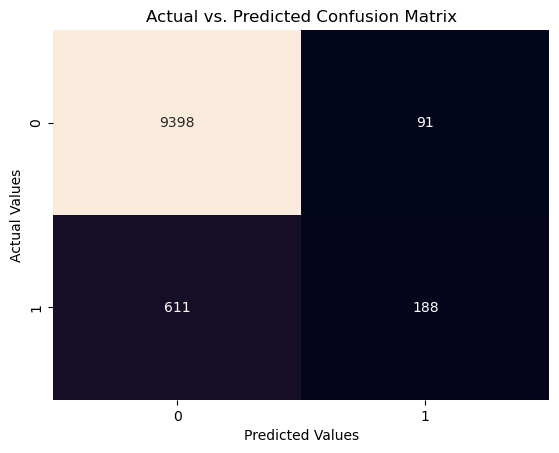

In [80]:
#Confusion metrics
conf_matrix_gb = create_conf_mat(y_test,y_pred_gb)
sns.heatmap(conf_matrix_gb,annot=True,fmt='d',cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

### Accuracy

In [81]:
#accuracy
accuracy_gb = model_gb.score(x_test,y_test)
accuracy_gb

0.9317651632970451

### Precision

In [82]:
#precision
precision_gb = metrics.precision_score(y_test,y_pred_gb)
precision_gb

0.6738351254480287

### Recall

In [83]:
#recall
recall_gb = metrics.recall_score(y_test,y_pred_gb)
recall_gb

0.23529411764705882

### Error Rate

In [84]:
test_error_rate_gb = 1 - accuracy_gb
print("Error Rate of our model is : %0.5f"%test_error_rate_gb)

Error Rate of our model is : 0.06823


### Area Under the Curve (AUC)

In [85]:
predictions_proba = model_gb.predict_proba(x_test)[:,1]
fpr2, tpr2, _ = roc_curve(y_test,predictions_proba,pos_label=1)

In [86]:
auc_gb = metrics.auc(fpr2,tpr2)

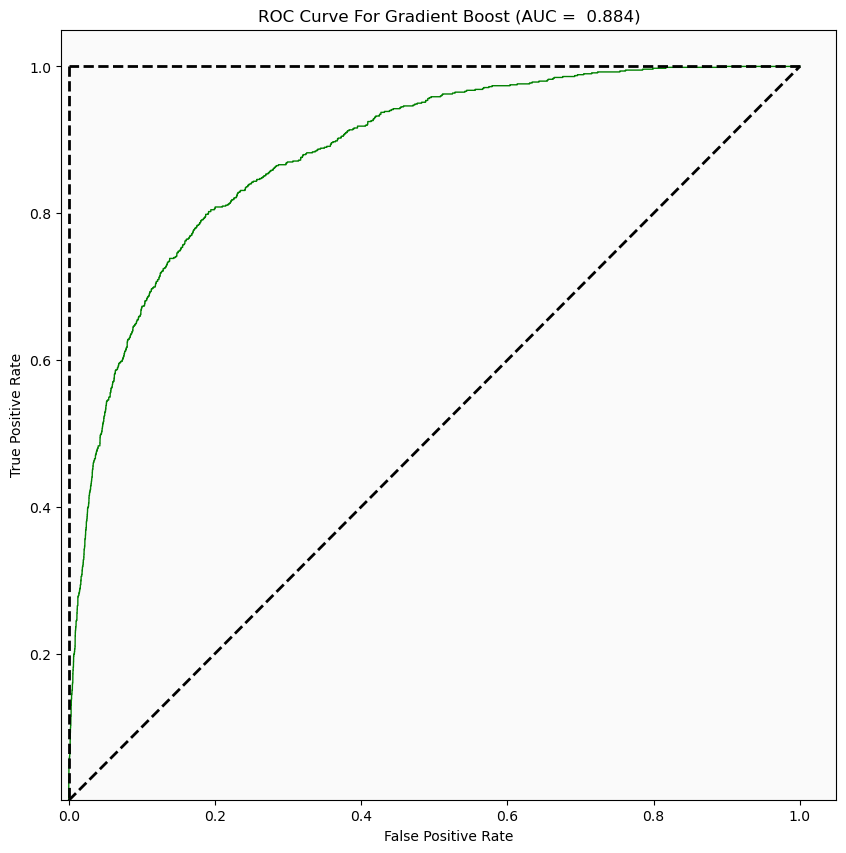

In [87]:
plot_roc_curve(fpr2, tpr2, auc_gb, 'gb',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

## Model 6 - SVM

### Optimization of HyperParameter C

In [95]:
C_range = list(np.arange(0.1,2,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear',C=c)
    scores = cross_val_score(svc,X,y,cv=10,scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9861555608629887, 0.9855266300453787, 0.9855266300453787, 0.9855266300453787, 0.9855266300453787, 0.9855266300453787, 0.9855266300453787, 0.9848976992277686, 0.9848976992277686, 0.9855266300453787, 0.9855266300453787, 0.9855266300453787, 0.9855266300453787]


Text(0, 0.5, 'Cross-Validate Accuracy')

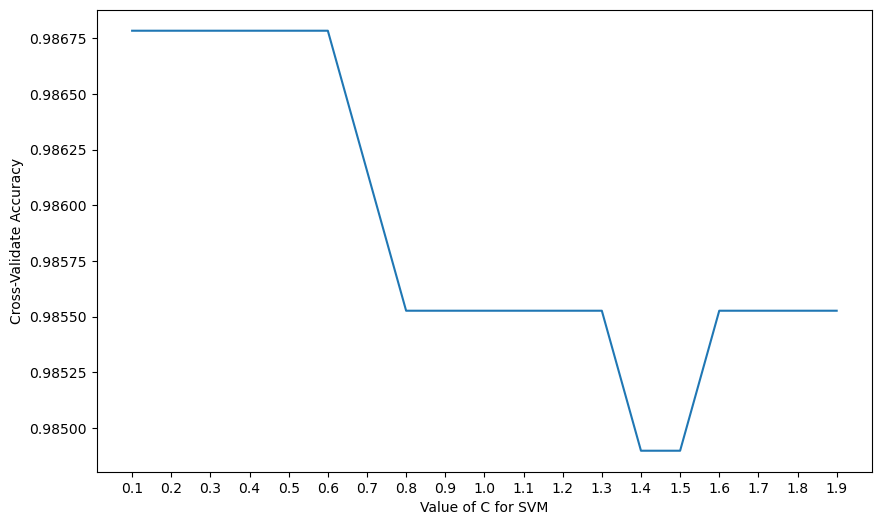

In [96]:
plt.figure(figsize=(10,6))
C_values = list(np.arange(0.1,2,0.1))
# plot C values in X-axis and cross_validate_accuracy on y-axis
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.1,2,0.1))
plt.xlabel('Value of C for SVM')
plt.ylabel('Cross-Validate Accuracy')

In [ ]:
#Observation - C value can be considered as 0.6

### Optimization the Hyper-Parameter Gamma

In [98]:
gamma_range = [0.0001,0.001,0.01,0.1,1,10,100]
acc_score = []
for g in gamma_range:
    svc = SVC(kernel='rbf',gamma=g)
    scores = cross_val_score(svc,X,y,cv=10,scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9848976992277685, 0.9848976992277685, 0.9848976992277685]


Text(0, 0.5, 'Cross-Validated Accuracy')

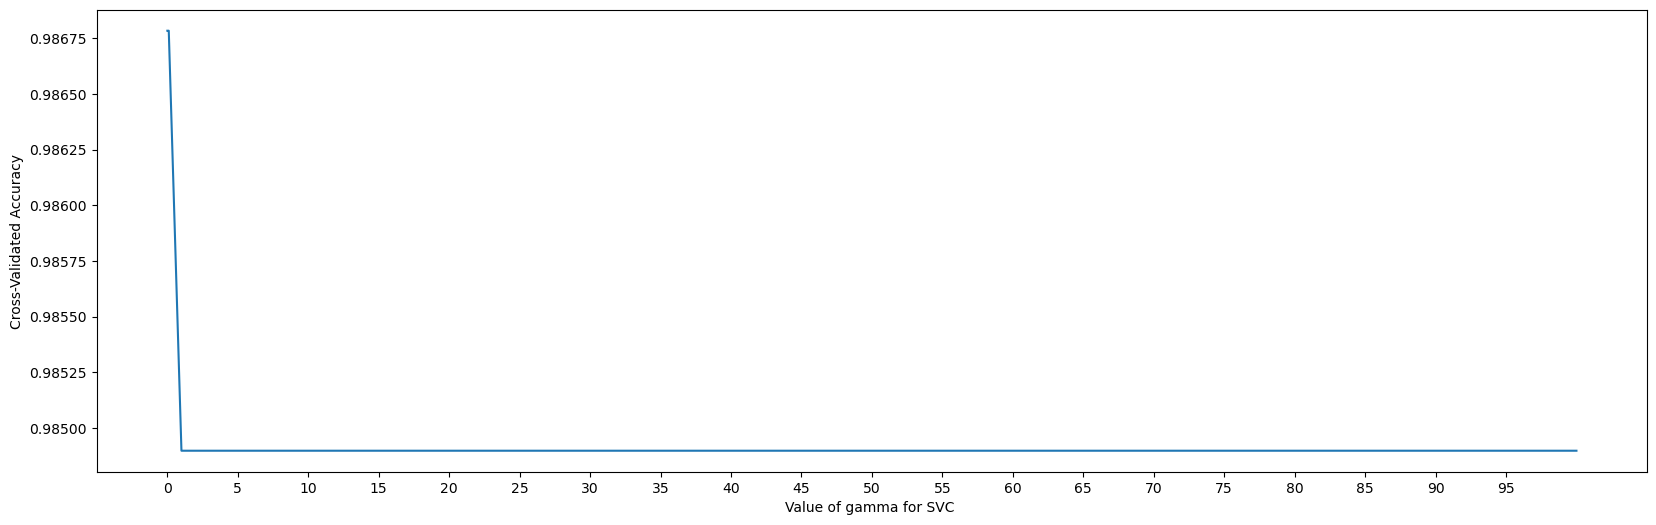

In [99]:
%matplotlib inline
plt.figure(figsize=(20,6))
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

In [100]:
#Observation : gamma can be taken as anyvalue since its almost same

### Optimization the Hyper-Parameter degree

In [101]:
degree_range = [2,3,4,5]
acc_score = []
for d in degree_range:
    svc = SVC(kernel='rbf',degree=d)
    scores = cross_val_score(svc,X,y,cv=10,scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988]


Text(0, 0.5, 'Cross-Validated Accuracy')

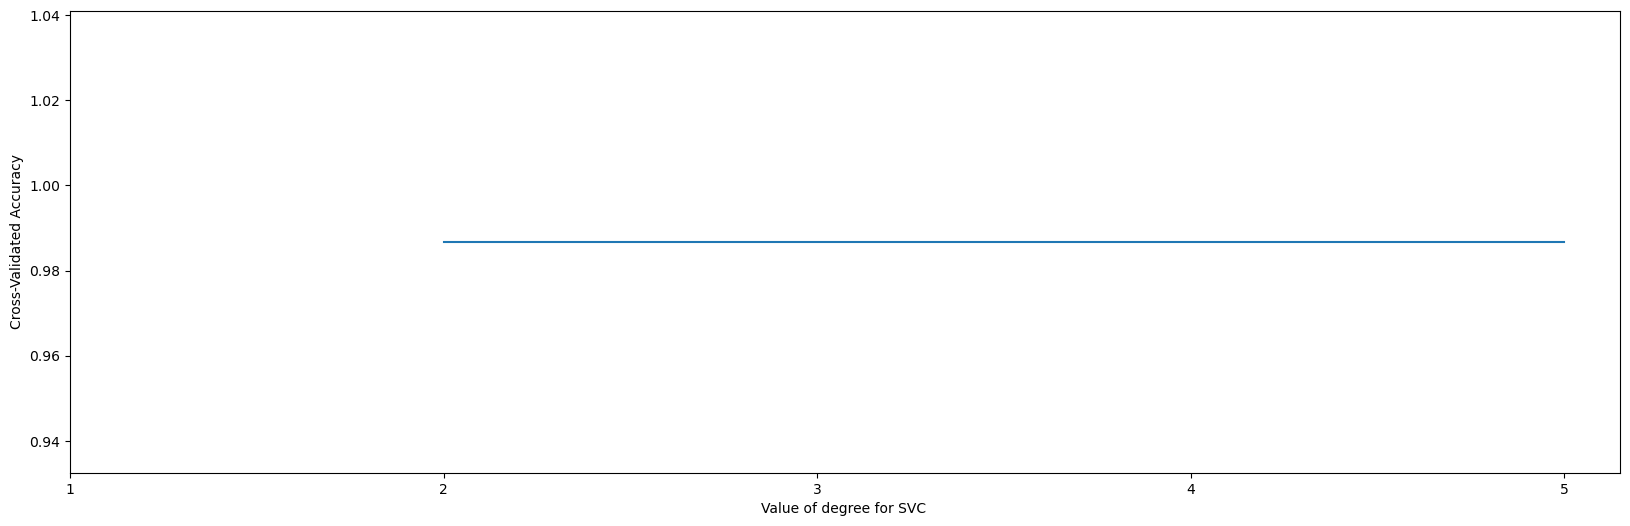

In [102]:
%matplotlib inline
plt.figure(figsize=(20,6))
gamma_range=[2,3,4,5]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree_range,acc_score)
plt.xlabel('Value of degree for SVC ')
plt.xticks(np.arange(1,6,1))
plt.ylabel('Cross-Validated Accuracy')

In [103]:
#Observation : degree can be taken as anyvalue since its almost same

### Optimized Parameter from GridSearchCV

In [91]:
tuned_parameter = {
    'C':[0.6],
    'kernel':['linear','rbf'],
    'degree':[2], 
    'gamma':[0.01]
}

In [89]:
model_svm = GridSearchCV(svc,tuned_parameter,cv=10,scoring='accuracy')

In [90]:
model_svm.fit(x_train,y_train)
print(model_svm.best_score_)

0.9176804109398862


In [92]:
print(model_svm.best_params_)

{'C': 0.6, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}


### Train and evaluate model

In [93]:
svc = SVC(kernel='linear',C=0.6,degree=2,gamma=0.01)
model_svc = svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)

## Performance

### Accuracy

In [94]:
print('Accuracy Score:')
accuracy_svc = metrics.accuracy_score(y_test,y_pred_svc)
print(accuracy_svc)

Accuracy Score:
0.9200038880248833


### Confusion Metrics

In [95]:
conf_matrix_svc = confusion_matrix(y_test,y_pred_svc)
conf_matrix_svc

array([[9408,   81],
       [ 742,   57]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

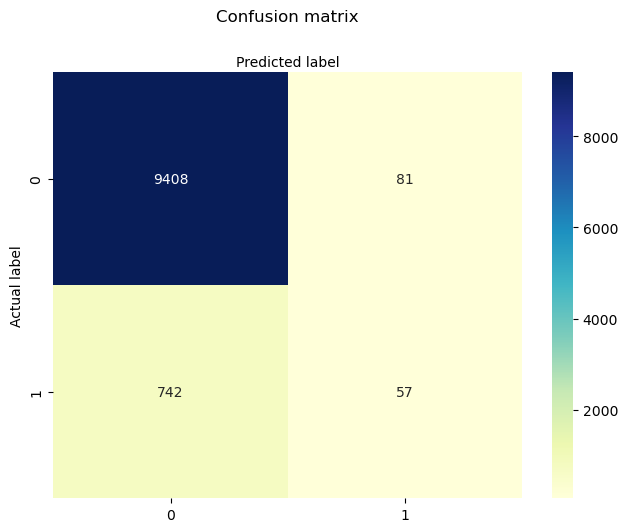

In [96]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix_svc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Recall

In [97]:
recall_svc = recall_score(y_test,y_pred_svc)
recall_svc

0.07133917396745933

### Precision

In [98]:
precision_svc = precision_score(y_test,y_pred_svc)
precision_svc

0.41304347826086957

### AUC Plot

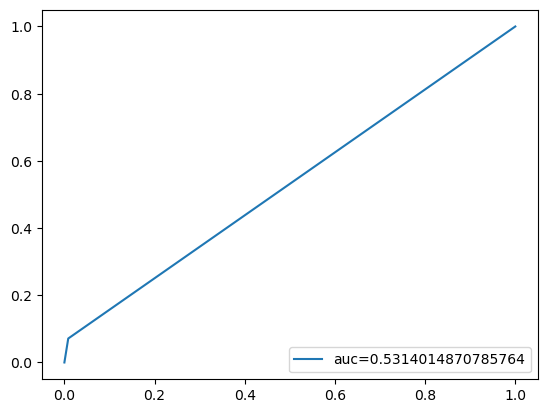

In [99]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_svc)
auc_svc = roc_auc_score(y_test, y_pred_svc)
plt.plot(fpr,tpr,label="auc="+str(auc_svc))
plt.legend(loc=4)
plt.show()

## Model 7 - Naive Bayes

In [100]:
# Init the Gaussian Classifier
model_nb = GaussianNB()

# Train the model
model_nb.fit(x_train, y_train)

GaussianNB()

In [101]:
# Predict Output 
y_pred_nb = model_nb.predict(x_test)
print(y_pred_nb[:150])

[0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1
 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0
 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1
 1 0]


## Performance

### Confusion Metrics

[]

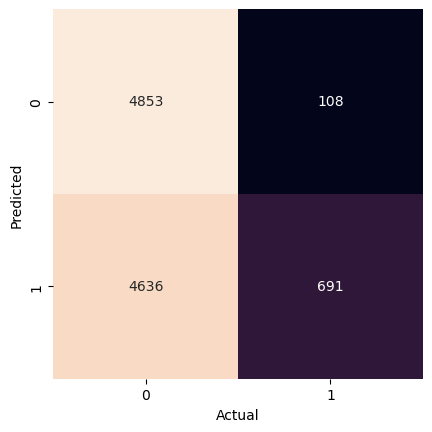

In [102]:
# Plot Confusion Matrix
#plt.figure(figsize=(10,8))
conf_matrix_nb = confusion_matrix(y_pred_nb, y_test)
names = np.unique(y_pred_nb)
sns.heatmap(conf_matrix_nb, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot()

### Classification report

In [103]:
# Predicted values
y_pred = y_pred_nb
# Actual values
y_act = y_test
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(y_pred_nb, y_test, labels=[0,1]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_pred_nb, y_test, labels=[0,1]))

[[4853  108]
 [4636  691]]
              precision    recall  f1-score   support

           0       0.51      0.98      0.67      4961
           1       0.86      0.13      0.23      5327

    accuracy                           0.54     10288
   macro avg       0.69      0.55      0.45     10288
weighted avg       0.69      0.54      0.44     10288



### Accuracy

In [104]:
print('Accuracy Score:')
accuracy_nb = metrics.accuracy_score(y_test,y_pred_nb)
print(accuracy_nb)

Accuracy Score:
0.5388802488335925


### Recall

In [105]:
recall_nb = recall_score(y_test,y_pred_nb)
recall_nb

0.8648310387984981

### Precision

In [106]:
precision_nb = precision_score(y_test,y_pred_nb)
precision_nb

0.12971653838933733

### AUC Plot

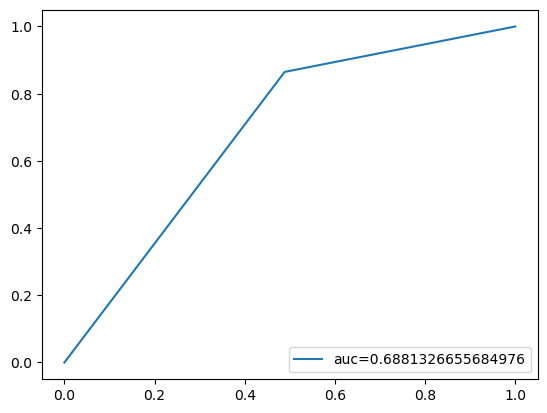

In [107]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_nb)
auc_nb = roc_auc_score(y_test, y_pred_nb)
plt.plot(fpr,tpr,label="auc="+str(auc_nb))
plt.legend(loc=4)
plt.show()

## Model 8 - KNN

### Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [24]:
accuracy_rate = []

# May take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10)
    accuracy_rate.append(score.mean())

In [25]:
error_rate = []

# May take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

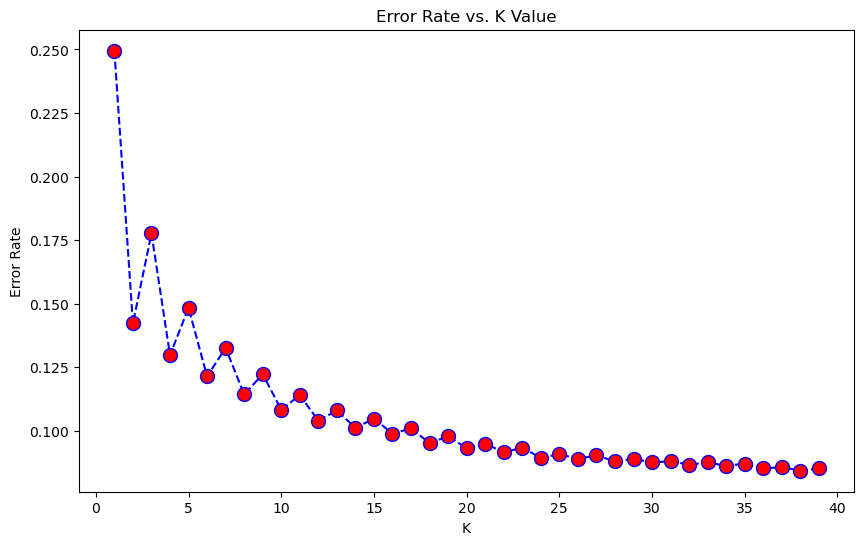

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy Rate')

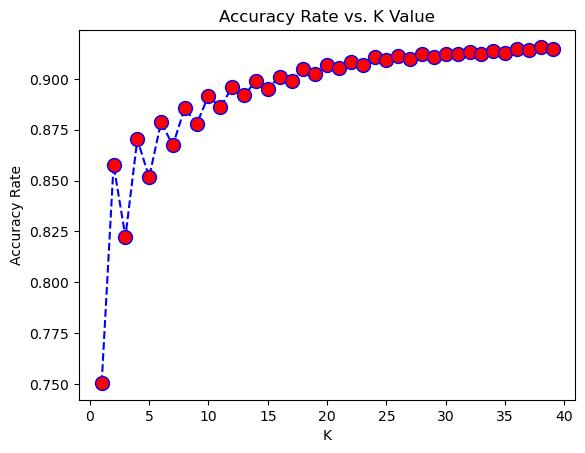

In [27]:
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

Here we can see that that after around K > 25 the error rate just tends to hover around 0.012-0.014 Let's retrain the model with that and check the classification report!

Also, in case of Accuracy, after around K > 25, the accuracy is also almost constant.

In [108]:
# K=25
knn = KNeighborsClassifier(n_neighbors=25)

model_knn = knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

print('WITH K=25')
print('\n')
print(confusion_matrix(y_test,y_pred_knn))
print('\n')
print(classification_report(y_test,y_pred_knn))

WITH K=25


[[9475   14]
 [ 771   28]]


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9489
           1       0.67      0.04      0.07       799

    accuracy                           0.92     10288
   macro avg       0.80      0.52      0.51     10288
weighted avg       0.90      0.92      0.89     10288



## Performance

### Confusion Metrics

[]

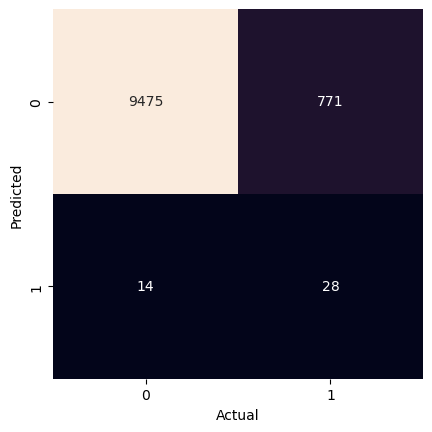

In [109]:
# Plot Confusion Matrix
#plt.figure(figsize=(10,8))
conf_matrix_knn = confusion_matrix(y_pred_knn, y_test)
names = np.unique(y_pred_knn)
sns.heatmap(conf_matrix_knn, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot()

### Classification report

In [110]:
print(confusion_matrix(y_test,y_pred_knn))
print('\n')
print(classification_report(y_test,y_pred_knn))

[[9475   14]
 [ 771   28]]


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9489
           1       0.67      0.04      0.07       799

    accuracy                           0.92     10288
   macro avg       0.80      0.52      0.51     10288
weighted avg       0.90      0.92      0.89     10288



### Accuracy

In [111]:
print('Accuracy Score:')
accuracy_knn = metrics.accuracy_score(y_test,y_pred_knn)
print(accuracy_knn)

Accuracy Score:
0.9236975116640747


### Recall

In [112]:
recall_knn = recall_score(y_test,y_pred_knn)
recall_knn

0.03504380475594493

### Precision

In [113]:
precision_knn = precision_score(y_test,y_pred_knn)
precision_knn

0.6666666666666666

### AUC Plot

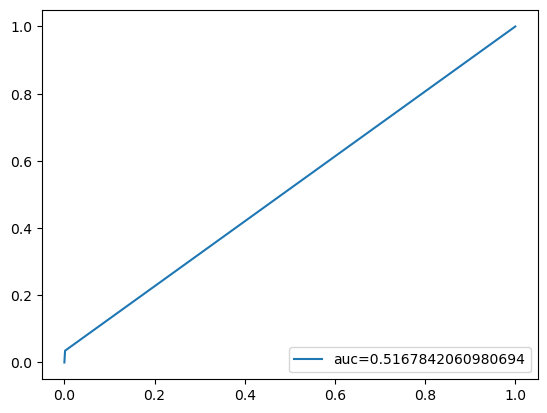

In [114]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_knn)
auc_knn = roc_auc_score(y_test, y_pred_knn)
plt.plot(fpr,tpr,label="auc="+str(auc_knn))
plt.legend(loc=4)
plt.show()

## Results

In [115]:
data = [[accuracy_logreg,precision_logreg, recall_logreg,auc_logreg],
        [accuracy_dt,precision_dt, recall_dt,auc_dt],
        [accuracy_rf,precision_rf, recall_rf,auc_rf],
        [accuracy_ab,precision_ab, recall_ab,auc_ab],
        [accuracy_gb,precision_gb, recall_gb,auc_gb],
       [accuracy_svc,precision_svc, recall_svc,auc_svc],
       [accuracy_nb,precision_nb, recall_nb,auc_nb],
       [accuracy_knn,precision_knn, recall_knn,auc_knn]]
result_df = pd.DataFrame(data,columns=["Accuracy","Precision","Recall","AUC"],
                         index=['LogisticRegression','DecisionTree','RandomForest',
                               'AdaBoost','GradientBoost','SVM','Naive Bayes','KNN'])

In [116]:
result_df

,Accuracy,Precision,Recall,AUC
LogisticRegression,0.919907,0.533333,0.057831,0.785273
DecisionTree,0.920198,0.523810,0.119277,0.795487
RandomForest,0.924184,0.787879,0.032541,0.827613
AdaBoost,0.925058,0.637255,0.081352,0.860851
GradientBoost,0.931765,0.673835,0.235294,0.883904
SVM,0.920004,0.413043,0.071339,0.531401
Naive Bayes,0.538880,0.129717,0.864831,0.688133
KNN,0.923698,0.666667,0.035044,0.516784


## Conclusion 

From above models, only Gradient Boost model is selected due to high accuracy


## FINAL MODEL

In [117]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [118]:
print("Data of training features: ",x_train.shape)
print("Data of testing features: ",x_test.shape)
print("\n")
print("Data of training target: ",y_train.shape)
print("Data of testing target: ",y_test.shape)

Data of training features:  (24004, 11)
Data of testing features:  (10288, 11)


Data of training target:  (24004,)
Data of testing target:  (10288,)


In [119]:
std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

### GradientBoost Classifier

In [120]:
fit_gb = GradientBoostingClassifier(random_state=40)

In [121]:
model_gb = fit_gb.set_params(n_estimators=500, 
                  learning_rate= 0.1, 
                  max_depth= 4, 
                  max_features= 'sqrt')

In [122]:
fit_gb.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=4, max_features='sqrt', n_estimators=500,
                           random_state=40)

### Predictions

In [123]:
y_pred_gb = fit_gb.predict(x_test)

In [124]:
print(y_pred_gb)

[0 0 0 ... 0 0 0]


In [125]:
print(y_test)

[0 0 0 ... 0 0 0]


## Performance

### Confusion Metrics

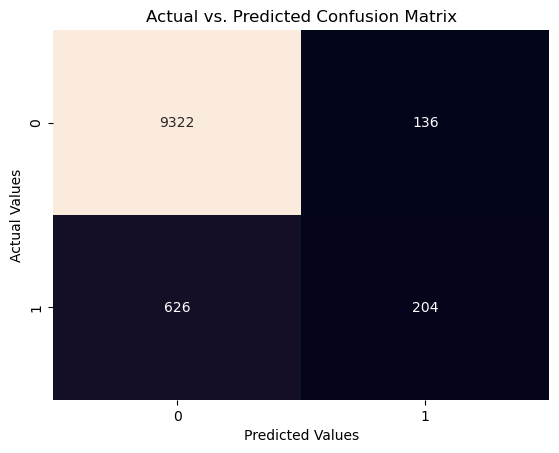

In [126]:
#Confusion metrics
conf_matrix = create_conf_mat(y_test,y_pred_gb)
sns.heatmap(conf_matrix,annot=True,fmt='d',cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

### Accuracy

In [127]:
#accuracy
accuracy = model_gb.score(x_test,y_test)
accuracy

0.9259331259720062

### Precision

In [129]:
#precision
precision = metrics.precision_score(y_test,y_pred_gb)
precision

0.6

### Recall

In [130]:
#recall
recall = metrics.recall_score(y_test,y_pred_gb)
recall

0.2457831325301205

### Error Rate

In [131]:
test_error_rate = 1 - accuracy_gb
print("Error Rate of our model is : %0.5f"%test_error_rate)

Error Rate of our model is : 0.06823


### Area Under the Curve (AUC)

In [132]:
predictions_proba = model_gb.predict_proba(x_test)[:,1]
fpr2, tpr2, _ = roc_curve(y_test,predictions_proba,pos_label=1)

In [134]:
auc = metrics.auc(fpr2,tpr2)

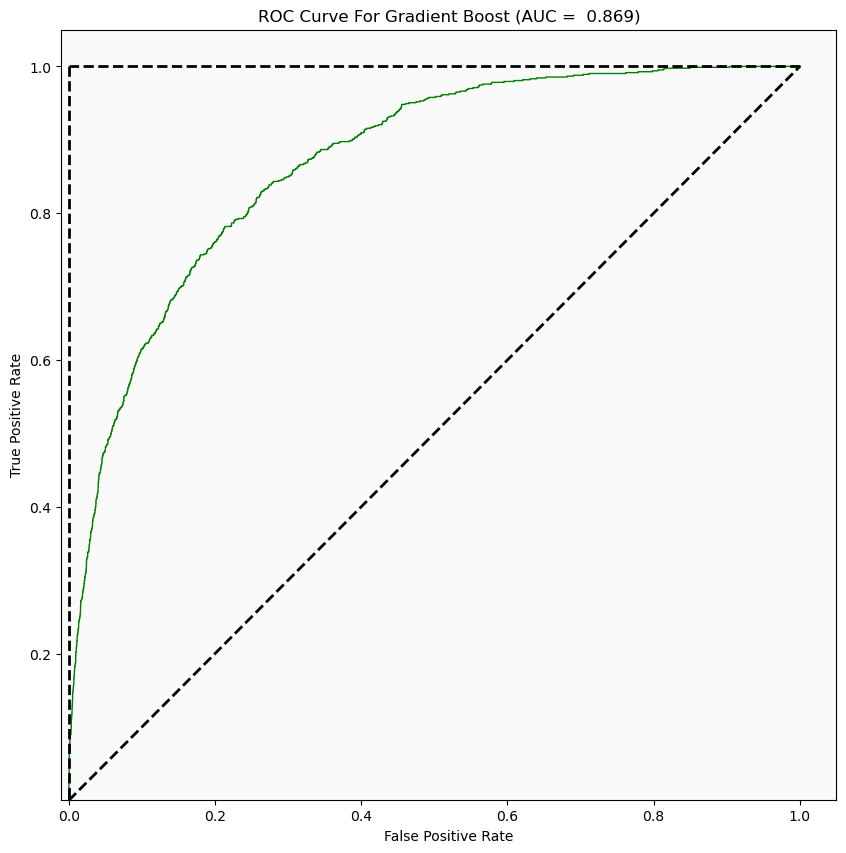

In [135]:
plot_roc_curve(fpr2, tpr2, auc, 'gb',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))